# Montain Cart using q_learning
Raissa Camelo et Mahya Faraji

In [1]:
# Pour que les changements dans les modules importés (bandits.py) soient pris en compte
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import q_learning as qlearn
import gym

### Initial Set-up

### Choice of environment

In [7]:
env = gym.make('MountainCar-v0') 

### Understanding the environment + Discretization


In [8]:
"""
  Each state consists of a tuple (position, velocity)
  *from the documentation:*
  Observation:
        Type: Box(2)
        Num    Observation               Min            Max
        0      Car Position              -1.2           0.6
        1      Car Velocity              -0.07          0.07
        
Therefore the need to create a Q-table with size n_positions, n_velocities, n_actions
We need to discretize the positions and velocities space, defining all possible positions and velocities
at each state (position_t, velocity_t)
"""

'\n  Each state consists of a tuple (position, velocity)\n  *from the documentation:*\n  Observation:\n        Type: Box(2)\n        Num    Observation               Min            Max\n        0      Car Position              -1.2           0.6\n        1      Car Velocity              -0.07          0.07\n        \nTherefore the need to create a Q-table with size n_positions, n_velocities, n_actions\nWe need to discretize the positions and velocities space, defining all possible positions and velocities\nat each state (position_t, velocity_t)\n'

In [9]:
env.observation_space.low # Min Position and Velocity

array([-1.2 , -0.07], dtype=float32)

In [10]:
env.observation_space.high # Max Position and Velocity

array([0.6 , 0.07], dtype=float32)

In [11]:
env.observation_space.high - env.observation_space.low # How many "states in between Max and Min"

array([1.8000001, 0.14     ], dtype=float32)

In [12]:
"""
Possible actions in the environment:
        Type: Discrete(3)
        Num    Action
        0      Accelerate to the Left
        1      Don't accelerate
        2      Accelerate to the Right
"""

"\nPossible actions in the environment:\n        Type: Discrete(3)\n        Num    Action\n        0      Accelerate to the Left\n        1      Don't accelerate\n        2      Accelerate to the Right\n"

In [13]:
print(env.action_space)
print(env.observation_space)

Discrete(3)
Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [14]:
env.action_space.n

3

We should do this discretization step at each new action of the agent (to update our Q-table in the proper position)

In [15]:
# Determine size of discretized state space
num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1
print(num_states)

[19 15]


In [146]:
# Discretize state
def discrete(state):
    state = (state - env.observation_space.low)*np.array([10, 100])
    state = np.round(state, 0).astype(int)
    return state

### Experiments:
We are going to test the following setups:
- q_learning with a fixed episilon value
- q_learning with a decaying episilon value

In [176]:
episodes = 400

## Fixed epsilon = 0.1
### Initiate q_learning

In [177]:
num_episodes = 10000
max_steps_per_episode = 200

learning_rate = 0.1  # alpha
discount_rate = 0.99 # Gammma

exploration_rate = 0.1 # non - decay epsilon 
actions = np.arange(0,env.action_space.n,1)

In [181]:
algo_qlearn = qlearn.QLearn(num_states,actions = actions,alpha=learning_rate,gamma = discount_rate,epsilon=exploration_rate,decay = False)

In [183]:
rewards_fixed = []
success_fixed = 0
for i_episode in range(episodes):
    state = env.reset()
    state = discrete(state)
    reward_total = 0
    for t in range(max_steps_per_episode): #
        env.render()
    
        # Get Action
        action = algo_qlearn.choose_action(state)
        #action = env.action_space.sample()
        #print(state)
        # Act in environment
        
        statex, reward, done, info = env.step(action)
        reward_total+=reward
        state2 = discrete(statex)
       
        #print(state, state2)
        
        # Update q-table do the .fit!
        algo_qlearn.learn(state,action,state2,reward)
        
        #print(action)
        #print(algo_qlearn.q[state[0],state[1],action])
        state = state2
        
        if done: 
            rewards_fixed.append(reward_total)
            if t < (max_steps_per_episode-1):
                success_fixed += 1
                print("Episode finished after {} timesteps, episode {}, position {}, velocity {} ".format(t+1,i_episode,str(round(statex[0],3)),str(round(statex[1],3))))
                #print(statex[0]) # (position = 0.5) flag/ end -1.2   0.6
            break
env.close()

In [212]:
cum_reward_fixed = np.cumsum(rewards_fixed)
print(success_fixed)

3


## Decaying epsilon
### Initiate q_learning

In [185]:
num_episodes = 10000
max_steps_per_episode = 200

learning_rate = 0.1  # alpha
discount_rate = 0.99 # Gammma

exploration_rate = 1 # epsilon Start by exploring
actions = np.arange(0,env.action_space.n,1)

In [196]:
algo_qlearn = qlearn.QLearn(num_states,actions = actions,alpha=learning_rate,gamma = discount_rate,epsilon=exploration_rate)

In [198]:
rewards_decay = []
success_decay = 0
for i_episode in range(episodes):
    state = env.reset()
    state = discrete(state)
    reward_total = 0
    for t in range(max_steps_per_episode): #
        env.render()
    
        # Get Action
        action = algo_qlearn.choose_action(state)
        #action = env.action_space.sample()
        #print(state)
        # Act in environment
        
        statex, reward, done, info = env.step(action)
        reward_total+=reward
        state2 = discrete(statex)
       
        #print(state, state2)
        
        # Update q-table do the .fit!
        algo_qlearn.learn(state,action,state2,reward)
        
        #print(action)
        #print(algo_qlearn.q[state[0],state[1],action])
        state = state2
        
        if done: 
            rewards_decay.append(reward_total)
            if t < (max_steps_per_episode-1):
                success_decay += 1
                print("Episode finished after {} timesteps, episode {}, position {}, velocity {} ".format(t+1,i_episode,str(round(statex[0],3)),str(round(statex[1],3))))
                # goal : (position = 0.5, velocity = 0) flag
            break
env.close()

Episode finished after 171 timesteps, episode 320, position 0.505, velocity 0.013 
Episode finished after 168 timesteps, episode 389, position 0.511, velocity 0.016 
Episode finished after 198 timesteps, episode 392, position 0.523, velocity 0.024 
Episode finished after 173 timesteps, episode 393, position 0.502, velocity 0.009 
Episode finished after 173 timesteps, episode 395, position 0.503, velocity 0.014 


In [199]:
cum_reward_decay = np.cumsum(rewards_decay)
print(success_decay)

5


In [200]:
len(cum_reward_decay)

400

In [201]:
len(cum_reward_fixed)

400

C:\Users\raiss\AppData\Local\Temp/ipykernel_8412/3209230905.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(cum_reward_decay / np.arange(0, episodes), label='e-greedy with decay')
C:\Users\raiss\AppData\Local\Temp/ipykernel_8412/3209230905.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(cum_reward_fixed / np.arange(0, episodes), label='e-greedy with fixed e')


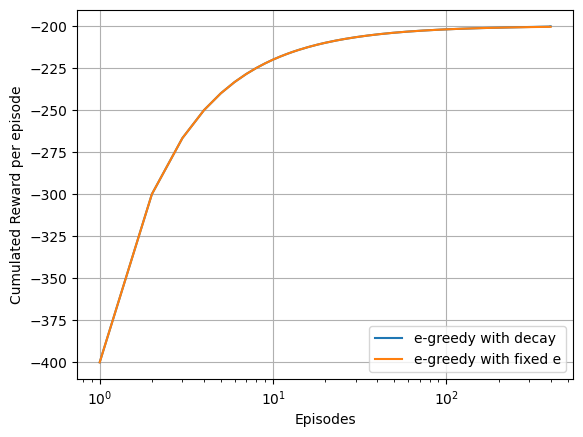

In [208]:

plt.semilogx(cum_reward_decay / np.arange(0, episodes), label='e-greedy with decay')
plt.semilogx(cum_reward_fixed / np.arange(0, episodes), label='e-greedy with fixed e') 
plt.xlabel('Episodes')
plt.ylabel('Cumulated Reward per episode')
plt.grid()
plt.legend()

C:\Users\raiss\AppData\Local\Temp/ipykernel_8412/4004535596.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(cum_reward_decay / np.arange(0, episodes), label='e-greedy with decay')


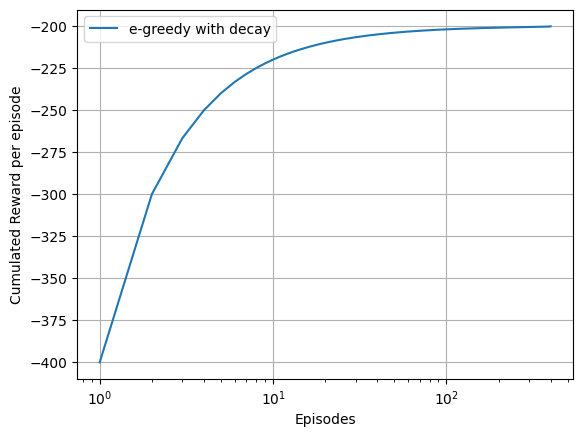

In [209]:
plt.semilogx(cum_reward_decay / np.arange(0, episodes), label='e-greedy with decay')
plt.xlabel('Episodes')
plt.ylabel('Cumulated Reward per episode')
plt.grid()
plt.legend()

C:\Users\raiss\AppData\Local\Temp/ipykernel_8412/2629242076.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(rewards_decay / np.arange(0, episodes), label='e-greedy with decay')
C:\Users\raiss\AppData\Local\Temp/ipykernel_8412/2629242076.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(rewards_fixed / np.arange(0, episodes), label='e-greedy with fixed e')


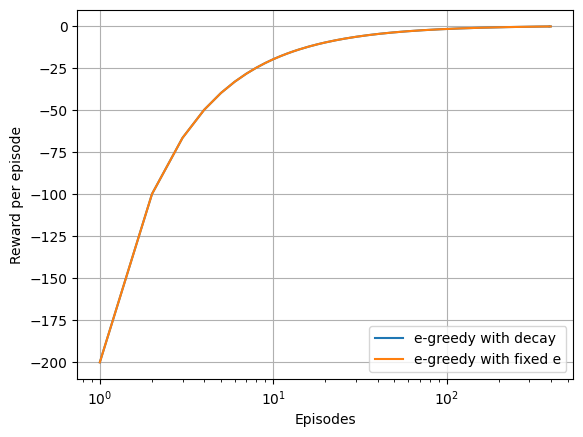

In [210]:

plt.semilogx(rewards_decay / np.arange(0, episodes), label='e-greedy with decay')
plt.semilogx(rewards_fixed / np.arange(0, episodes), label='e-greedy with fixed e') 
plt.xlabel('Episodes')
plt.ylabel('Reward per episode')
plt.grid()
plt.legend()

C:\Users\raiss\AppData\Local\Temp/ipykernel_8412/1594270789.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(rewards_decay / np.arange(0, episodes), label='e-greedy with decay')


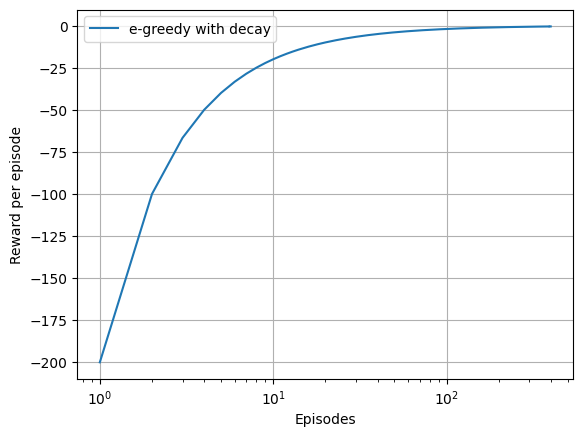

In [211]:
plt.semilogx(rewards_decay / np.arange(0, episodes), label='e-greedy with decay')
plt.xlabel('Episodes')
plt.ylabel('Reward per episode')
plt.grid()
plt.legend()

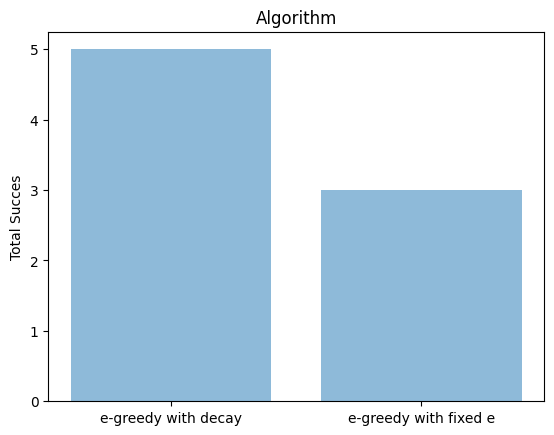

In [206]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('e-greedy with decay','e-greedy with fixed e')
y_pos = np.arange(len(objects))
performance = [success_decay,success_fixed]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total Succes')
plt.title('Algorithm')

plt.show()

The reward curve is the same for both q_learning with and without epsilon decay, which can be explained by the fact that our state space is very large (q_table dimensions are 19 (positions) x15 (velocities)x 3 (actions)), therefore, even with a small fixed value for epsilon (lower chances of exploration), at the beginning, the action choice ends up in an unexplored region as most of the position x velocity pairs are unexplored in the first episodes. In total, there are 855 q_values to cover, also taking in consideration that the total of (position, velocity) pairs have been rounded (discretized) or otherwise there would be a much larger state space to cover since both position and velocity are continuous values.

Besides, one can observe that the way the q_values are updated: Q(s, a) += alpha * (reward(s,a) + gamma * max(Q(s', a') - Q(s,a)) also influences in the reward curve form, since each update is discounted by both alpha and gamma values, allowing a slower increase in q_values for the actions with good returns and a slower decrease for the actions with bad returns, which in turn allows the algorithm to explore more instead of taking the same routs. In general, for this specific environment, the reward of an action that achieves the goal is 0, thus the q_values for that action in that state slightly increases towards 0, also taking in consideration the reward for the next greedy-action. This enables the algorithm to learn a chain of actions that will result in the best reward.

Despite both reward curves been close, the total number of success (goal achieved) is greater for the epsilon-decay algorithm, which shows that even though they both "converge" at maximum reward by the end of the episodes, starting of with a larger exploration rate enables the algorithm to try more paths in the beginning, leading to a faster "convergence", even though the q_value differences aren't dramatic in the beginning for the fixed epsilon algorithm. 

Travail attendu: sur au moins un environnement, avec au moins un algorithme (SARSA, Q-learning, Expected SARSA), faire une expérience illustrant l'apprentissage (par exemple l'évolution de la récompense totale par épisode) puis mener une autre expérience pour essayer d'améliorer les performances (par exemple en réglant un hyperparamètre); présentez votre démarche et analysez vos résultats dans un petit compte-rendu, qui peut être intégré à votre code dans un notebook. Merci de laisser les résultats affichés dans le notebook pour ne pas avoir à faire tourner votre code systématiquement.

De rien.